Size of the training set: 21, Generalization gap: 7.619048, Gen gap Estimate 7.707261, Success Rate: 0.744000, Lower Bound: 0.539659, MSE: 0.438181
Size of the training set: 40, Generalization gap: 4.000000, Gen gap Estimate 5.961704, Success Rate: 0.563000, Lower Bound: 0.516914, MSE: 2.560407
Size of the training set: 60, Generalization gap: 2.666667, Gen gap Estimate 5.292476, Success Rate: 0.554000, Lower Bound: 0.508581, MSE: 2.685345
Size of the training set: 80, Generalization gap: 2.000000, Gen gap Estimate 5.008696, Success Rate: 0.544000, Lower Bound: 0.504414, MSE: 2.504683
Size of the training set: 100, Generalization gap: 1.600000, Gen gap Estimate 4.799221, Success Rate: 0.532000, Lower Bound: 0.501914, MSE: 3.233798
Size of the training set: 120, Generalization gap: 1.333333, Gen gap Estimate 4.691021, Success Rate: 0.511000, Lower Bound: 0.500248, MSE: 3.636707
Size of the training set: 140, Generalization gap: 1.142857, Gen gap Estimate 4.560086, Success Rate: 0.492000

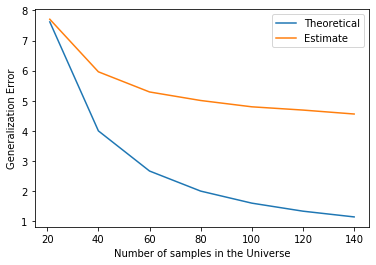

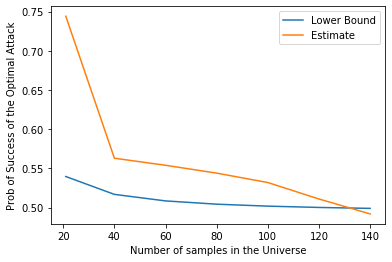

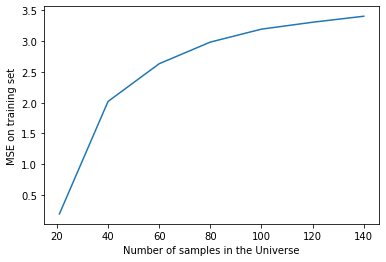

In [1]:
import numpy as np
import math
from numpy import linalg as la
from numpy import random as rd
import pandas as pd
from matplotlib import pyplot as plt
import os
from GaussianExp import Experiment1, DrawX, SamplerTheta, SamplerS, PSucLB, gss

path = './plots/Gaussian'

if not os.path.exists(path):
    os.mkdir(path)

# Fixing parameters of the experiment.
    
rd.seed(9)
d = 20
sigmaX = 2
beta = rd.uniform(-sigmaX,sigmaX,d)
sigmaY = 2
range_ = [21,40,60,80,100,120,140]
precision = 1000

genErrEmpList = []
genErrBList = []
SucRateList = []
LBList = []
mseList = []

for n in range_: #Loop over size of the training set.
    
    X = DrawX(d,n,sigmaX) # X is fixed for each n.
    Q = np.transpose(X)@X 
    Qinv = la.inv(Q)
    Normal0 = SamplerTheta(0,beta,Qinv,sigmaY,X) #Distribution of the model parameters given T=0
    NormalY = SamplerS(beta,sigmaY,X)
    
    # Generalization gap.
    genErr = 2*d*(sigmaY**2)/n
    
    # MSE
    mseAuxList = []
    
    #Generalization gap estimation.
    genErrList = []
    
    #Lower bound on probability of Success.
    auxF = lambda param : PSucLB(sigmaY,n,d,param)
    inter = gss(auxF, 0, 40)
    value = (inter[1]+inter[0])/2
    LB = PSucLB(sigmaY,n,d,value)
    
    n_Suc = 0
    for seed in range(precision): # Repeating the experiment described by algorithm 1 "precision" times.
        Suc, genErrEmp, mse = Experiment1(X,beta,Qinv,Normal0,NormalY,sigmaY,seed*3)
        n_Suc += Suc
        genErrList.append(genErrEmp)
        mseAuxList.append(mse)
    
    # Success rate for the optimal attack.
    SucRate = n_Suc/precision
    
    genErrEmp = np.mean(genErrList)
    genErrEmpList.append(genErrEmp) # Empirical Generalization gap, averaged over different models.
    genErrBList.append(genErr) # Generalization gap, computed analytically.
    SucRateList.append(SucRate) # Success rate of the optimal attacker.
    LBList.append(LB) # Lower bound on success rate of the optimal attacker.
    mseList.append(np.mean(mseAuxList)) #MSE on the training set, averaged over different models.
    
    print('Size of the training set: %d, Generalization gap: %f, Gen gap Estimate %f, Success Rate: %f, Lower Bound: %f, MSE: %f' % 
          (n,genErr,genErrEmp,SucRate,LB, mse))    

# Plotting and saving data.
    
SucRate = pd.DataFrame(genErrBList, columns=['c'])
SucRate.insert(0,'a',SucRateList)
SucRate.insert(2,'b',range_)
SucRate.to_csv(path+'/SucRateVsGenD20.csv',index=False)

genErrEmp = pd.DataFrame(genErrBList, columns=['c'])
genErrEmp.insert(0,'a',genErrEmpList)
genErrEmp.insert(2,'b',range_)
genErrEmp.to_csv(path+'/genEmpVsTheoreticalD20.csv',index=False)

plt.figure(1)
plt.plot(range_,genErrBList)
plt.plot(range_,genErrEmpList)
plt.legend(['Theoretical','Estimate'])
plt.xlabel('Number of samples in the Universe')
plt.ylabel('Generalization Error')
plt.show()  

PSucLB = pd.DataFrame(genErrBList, columns=['c'])
PSucLB.insert(0,'a',LBList)
PSucLB.insert(2,'b',range_)
PSucLB.to_csv(path+'/LBVsGenD20.csv',index=False)

MSEdf = pd.DataFrame(mseList, columns=['a'])
MSEdf.insert(0,'b',range_)
MSEdf.to_csv(path+'/MSEVsND20.csv',index=False)
    
plt.figure(2)
plt.plot(range_,LBList)
plt.plot(range_,SucRateList)
plt.legend(['Lower Bound','Estimate'])
plt.xlabel('Number of samples in the Universe')
plt.ylabel('Prob of Success of the Optimal Attack')
plt.show()    

plt.figure(3)
plt.plot(range_,mseList)
plt.xlabel('Number of samples in the Universe')
plt.ylabel('MSE on training set')
plt.show()    